About the data

Source: https://www.kaggle.com/loveall/clicks-conversion-tracking
       
       
Question to answer

1. How to optimize the social ad campaigns for the highest conversion rate possible? (Attain best Reach to Conversion ratios/Click to Conversion ratios)

2. Finding the perfect target demographics with the appropriate click through rates

3. Understanding the ideal turnaround/decision making time per age group to convert and re-target future social campaigns

4. Comparing the individual campaign performance so the best creative/campaign can be run again with adjusted audiences.

    •    Do data cleaning and data preparing activities, if required.
    •    Run descriptive analytics on the prepared data and draw tables, charts and graphs.
    •    Interpret the charts and graphs and list out the insights.
    •    You can use any one (1) tool to run descriptive analytics.
    •    Excel or R or Python or Matlab or Tableau or SPSS or any other tool at your disposal.

In [2]:
#importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#reading the file

df = pd.read_csv(r"C:\Users\chhok\Downloads\KAG_conversion_data.csv")

In [4]:
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2


1.) ad_id: an unique ID for each ad.

2.) xyzcampaignid: an ID associated with each ad campaign of XYZ company.

3.) fbcampaignid: an ID associated with how Facebook tracks each campaign.

4.) age: age of the person to whom the ad is shown.

5.) gender: gender of the person to whim the add is shown

6.) interest: a code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s Facebook public profile).

7.) Impressions: the number of times the ad was shown.

8.) Clicks: number of clicks on for that ad.

9.) Spent: Amount paid by company xyz to Facebook, to show that ad.

10.) Total conversion: Total number of people who enquired about the product after seeing the ad.

11.) Approved conversion: Total number of people who bought the product after seeing the ad.


In [5]:
# checking of any null value

df.isnull().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [6]:
#checking the data type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ad_id,1143.0,987261.130359,193992.814738,708746.0,777632.50,1121185.00,1121804.500,1.314415e+06
xyz_campaign_id,1143.0,1067.382327,121.629393,916.0,936.00,1178.00,1178.000,1.178000e+03
fb_campaign_id,1143.0,133783.989501,20500.308622,103916.0,115716.00,144549.00,144657.500,1.799820e+05
interest,1143.0,32.766404,26.952131,2.0,16.00,25.00,31.000,1.140000e+02
Impressions,1143.0,186732.132983,312762.183208,87.0,6503.50,51509.00,221769.000,3.052003e+06
Clicks,1143.0,33.390201,56.892438,0.0,1.00,8.00,37.500,4.210000e+02
Spent,1143.0,51.360656,86.908418,0.0,1.48,12.37,60.025,6.399500e+02
Total_Conversion,1143.0,2.855643,4.483593,0.0,1.00,1.00,3.000,6.000000e+01
Approved_Conversion,1143.0,0.944007,1.737708,0.0,0.00,1.00,1.000,2.100000e+01


In [8]:
#checking age range

df.age.unique()

array(['30-34', '35-39', '40-44', '45-49'], dtype=object)

In [9]:
#checking unique campaign id

df.xyz_campaign_id.unique()

array([ 916,  936, 1178], dtype=int64)

In [10]:
#checking unique values in fb_campaign

df.fb_campaign_id.unique()

array([103916, 103917, 103920, 103928, 103929, 103940, 103941, 103951,
       103952, 103955, 103962, 103965, 103968, 103976, 103978, 103979,
       103988, 103989, 104012, 104013, 104034, 104049, 104061, 104085,
       104108, 104109, 104133, 104140, 104185, 104205, 104220, 104228,
       104229, 104230, 104239, 104252, 104265, 104270, 104272, 104285,
       104287, 104328, 104396, 104419, 104423, 104438, 104467, 108654,
       108655, 108660, 108664, 108665, 108668, 108672, 108678, 108680,
       108683, 108686, 108689, 108690, 108691, 108692, 108716, 108720,
       108729, 108730, 108740, 108742, 108750, 108752, 108753, 108761,
       108762, 108764, 108766, 108770, 108774, 108776, 108781, 108786,
       108788, 108791, 108792, 108793, 108794, 108797, 108804, 108809,
       108810, 108811, 108817, 108818, 108822, 108823, 108826, 108827,
       108834, 108836, 109448, 109451, 109452, 109470, 109472, 109473,
       109498, 109507, 109553, 109565, 109601, 109629, 109633, 109637,
      

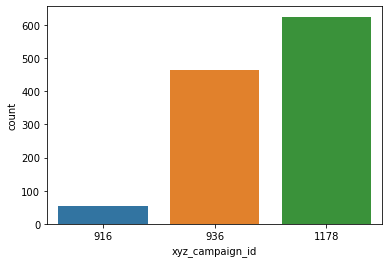

In [11]:
# count plot on single categorical variable 

sns.countplot(x ='xyz_campaign_id', data = df) 

# Show the plot 

plt.show()

Campaign_id 1178 has the highest count of campaigns



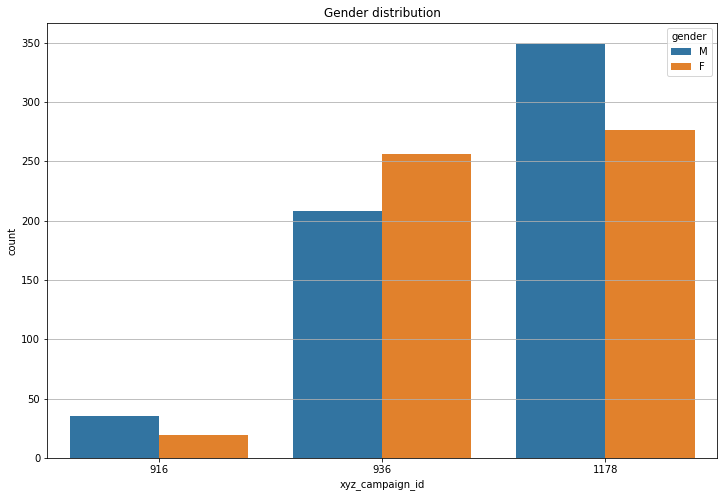

In [12]:
fig=plt.figure(figsize=(12,8))

sns.countplot(data=df, x='xyz_campaign_id', hue='gender')
plt.title('Gender distribution')
plt.grid(axis='y')

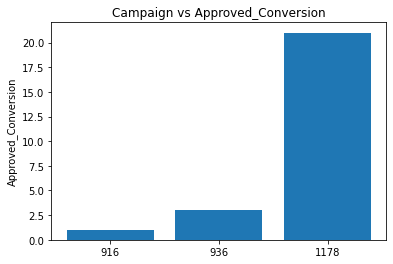

In [13]:
#Approved_Conversion

# Creating bar plot

plt.bar(df["xyz_campaign_id"].astype(str), df["Approved_Conversion"])
plt.ylabel("Approved_Conversion")
plt.title("Campaign vs Approved_Conversion")
plt.show()

From the above graphs we can see that campaign with id 1178 has maximum number of count and highest Approved conversion so most peolples are buying product through this campaing.

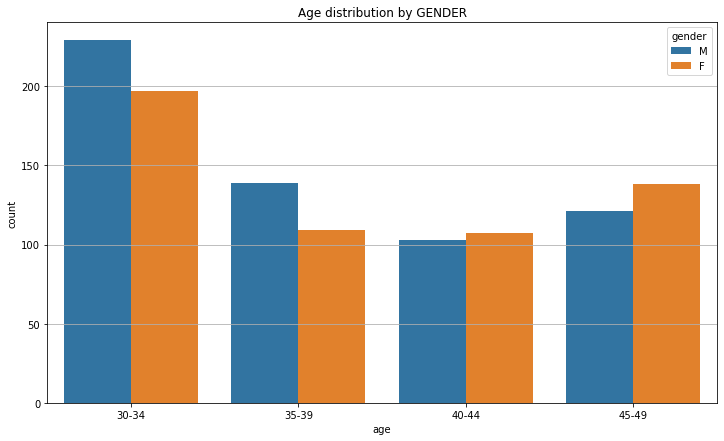

In [14]:
fig=plt.figure(figsize=(12,7))

sns.countplot(data=df, x='age', hue='gender')
plt.title('Age distribution by GENDER')
plt.grid(axis='y')

Both male and female show similar interests in all campaign but there is rise in count in age group 30-34



<AxesSubplot:xlabel='xyz_campaign_id', ylabel='Approved_Conversion'>

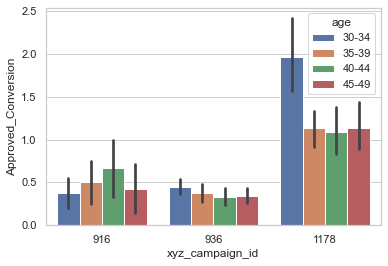

In [15]:
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
sns.barplot(x=df["xyz_campaign_id"], y=df["Approved_Conversion"], hue=df["age"], data=tips)

Age group 30-34 has the highest "Approved_Conversion" rate in campaign id-(1178, 936) but in campaign id-916 40 to 44 age group's peole has higher rate of conversion.

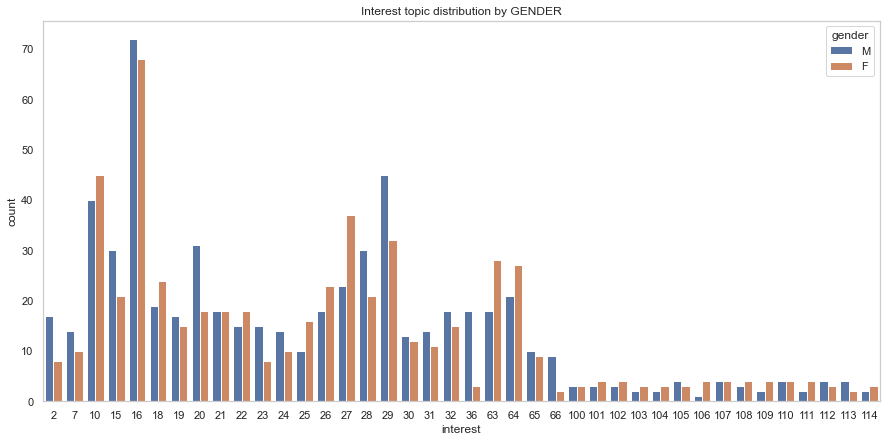

In [16]:
fig=plt.figure(figsize=(15,7))

sns.countplot(data=df, x='interest', hue='gender')
plt.title('Interest topic distribution by GENDER')
plt.grid(axis='y')

Intrest 16,10,29 has more no of counts.

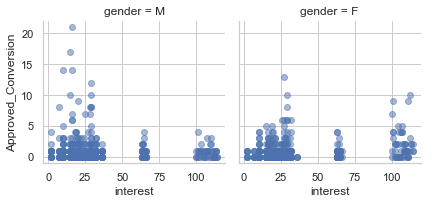

In [25]:
c = sns.FacetGrid(df, col="gender")
c.map(plt.scatter, "interest", "Approved_Conversion", alpha=.5)
c.add_legend()

There is rise at 'interest' 16 also in 'Approved_Conversion'
There is a fall in interest after 100 but not in 'Approved_conversion'

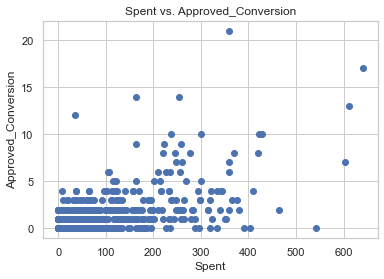

In [26]:
plt.scatter(df["Spent"], df["Approved_Conversion"])
plt.title("Spent vs. Approved_Conversion")
plt.xlabel("Spent")
plt.ylabel("Approved_Conversion")
plt.show()

Amount of money spent increase 'approved_Conversion' is increasing

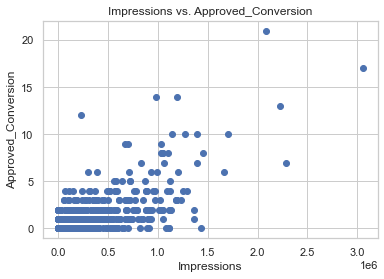

In [27]:
plt.scatter(df["Impressions"], df["Approved_Conversion"])
plt.title("Impressions vs. Approved_Conversion")
plt.xlabel("Impressions")
plt.ylabel("Approved_Conversion")
plt.show()

After a certain point of impression there is sudden rise in 'Approved_Conversion'

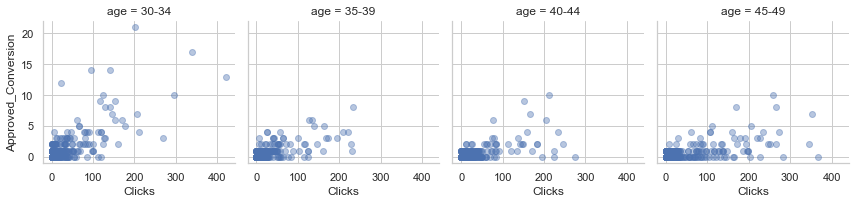

In [28]:
c = sns.FacetGrid(df, col="age")
c.map(plt.scatter, "Clicks", "Approved_Conversion", alpha=.4)
c.add_legend()

People in age group by more product because it seems like they have higher tendency to buy product after clicking the ad while in age group 45 to 49 people clicks more on ad but have a lower 'Approved_conversion' rate comparitively.

Results

1.)Age Group 30-34: This age group has lesser percentage of click through rates but they have higher ratio in buying the product and doing enquiry about the product. Hence, they are risk takers who sees the ad clicks and most of the time takes the product.

2.)Age group 45-49: This age group clicks on ad more no. of times but don't buy the product or enquire frequently.
Thus the company can target on age group 30-34

3.)Both the genders shows similar interests in all three campaigns.

4.)As the amount of money spent increases, no of product bought increases.
There is a sudden rise in the Approved_Conversion after a certain point in Impressions.

5.)"Impressions" and "Total_Conversion" are more correlated with "Approved_Conversion" than "Clicks" and "Spent".

6.)The highest amount of moneyspent by a company to display ads lies in the category of interests: 10, 15, 16, 27, 28, 29 and 63.

7.)Facebook had more sales as compared to other companies
Both the companies got highest amount clicks from age group 45-49 and gender female . Clearly, facebook ads got more clicks.


Business Questions

1)How to optimize the social ad campaigns for the highest conversion rate possible. (Attain best Reach to Conversion ratios/Click to Conversion ratios)

=> Since highest conversion rate was attained in campaign_1178, we can consider the factors contributed in this campaign:

The number of ad counts should be more for better reach.

The age group of 30-34 should be the main aim.

People with interest types after 100 should be given more attention

More the number of times the add is shown i.e. "impression", more approved_conversion rate is achieved.

2)Finding the perfect target demographics with the appropriate clickthrough rates

Women tend to buy the product more often after clicking the ad than men.
Also the age group 30 to 34 buy the product more often after clicking the ad


3)Understanding the ideal turnaround/decision making time per age group to convert and retarget future social campaigns

Age group 30-34 tend to take less decision making time followed by 35 to 39 and 40-44.
Age group 45-49 take the most time to decide.


4)Comparing the individual campaign performance so the best creative/campaign can be run again with adjusted audiences.

clearly campaign_1178 wins the battle due to highest approved_conversion rate.
Also campaign_a does pretty well , considering the number of ads it involves. With less no of ads, it has managed to peform better than campaign_b with large no of ads.

NIKHIL CHHOKAR
   chhokarnikhil@gmail.com
    9911581486

END